# Library Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Loading Data

In [2]:
food = pd.read_csv("../data/processed/food.csv", index_col=0)
food.head()

,province,town,market,latitude,longitude,category,commodity,price,usdprice,unit,quantity
date,,,,,,,,,,,
2015-04-15,Alger,Hydra,Algiers,36.75,3.04,cereals and tubers,Pasta,60.0,0.61,g,500.0
2015-04-15,Alger,Hydra,Algiers,36.75,3.04,cereals and tubers,Potatoes,80.0,0.81,kg,1.0
2015-04-15,Alger,Hydra,Algiers,36.75,3.04,cereals and tubers,Rice,90.0,0.91,kg,1.0
2015-04-15,Alger,Hydra,Algiers,36.75,3.04,"meat, fish and eggs",Eggs,300.0,3.05,pcs,30.0
2015-04-15,Alger,Hydra,Algiers,36.75,3.04,"meat, fish and eggs",Meat (chicken),277.0,2.81,kg,1.0


In [3]:
indicators = pd.read_csv("../data/processed/indicators.csv", index_col=0)
indicators.head(10)

,"Population, total",Food production index (2014-2016 = 100),"Goods imports (BoP, current US$)","Goods exports (BoP, current US$)",Consumer price index (2010 = 100),Crop production index (2014-2016 = 100),Cereal production (metric tons),"Inflation, GDP deflator (annual %)","Inflation, GDP deflator: linked series (annual %)","Inflation, consumer prices (annual %)","Official exchange rate (LCU per US$, period average)","Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (annual % growth)","Agriculture, forestry, and fishing, value added (current US$)"
Year,,,,,,,,,,,,,,
2015-01-01,40019529,100.26,5.226121e+10,3.444918e+10,126.736646,101.74,3761229.60,-4.986745,-4.986745,4.784447,100.691433,10.532790,6.950701,1.974833e+10
2016-01-01,40850721,102.79,4.931688e+10,2.931694e+10,134.844870,103.33,3445227.37,0.856688,0.856688,6.397695,109.443067,11.068313,1.604947,2.000751e+10
2017-01-01,41689299,102.87,4.881076e+10,3.456962e+10,142.384203,104.40,3478175.14,4.938007,4.938007,5.591116,110.973017,11.031881,-4.081554,2.094743e+10
2018-01-01,42505035,108.63,4.828409e+10,4.112352e+10,148.463995,115.36,6066238.69,6.164678,6.164678,4.269990,116.593792,11.243830,3.262143,2.187538e+10
2019-01-01,43294546,112.36,4.432017e+10,3.531271e+10,151.361668,121.01,5633592.07,0.882993,0.882993,1.951768,119.353558,11.479180,2.560218,2.220758e+10
2020-01-01,44042091,112.50,3.490724e+10,2.191499e+10,155.017250,120.95,4393330.47,-4.711384,-4.711384,2.415131,126.776800,12.834169,2.818352,2.116013e+10
2021-01-01,44761099,104.83,3.739502e+10,3.862835e+10,166.218895,108.76,2784008.92,15.932600,15.932600,7.226063,135.064058,11.235435,-2.208717,2.092389e+10
2022-01-01,45477389,111.22,3.869293e+10,6.568972e+10,181.619932,118.19,4718203.91,22.951263,22.951263,9.265516,141.994975,10.613178,5.167397,2.394741e+10
2023-01-01,46164219,NaN,4.285191e+10,5.554942e+10,198.550858,NaN,NaN,0.854841,0.854841,9.322174,135.842933,13.086784,2.922659,3.240630e+10


In [4]:
food.index = pd.to_datetime(food.index)
indicators.index = pd.to_datetime(indicators.index)

# Exploratory Data Analysis

<Axes: title={'center': 'Count by Category'}, xlabel=' ', ylabel='count'>

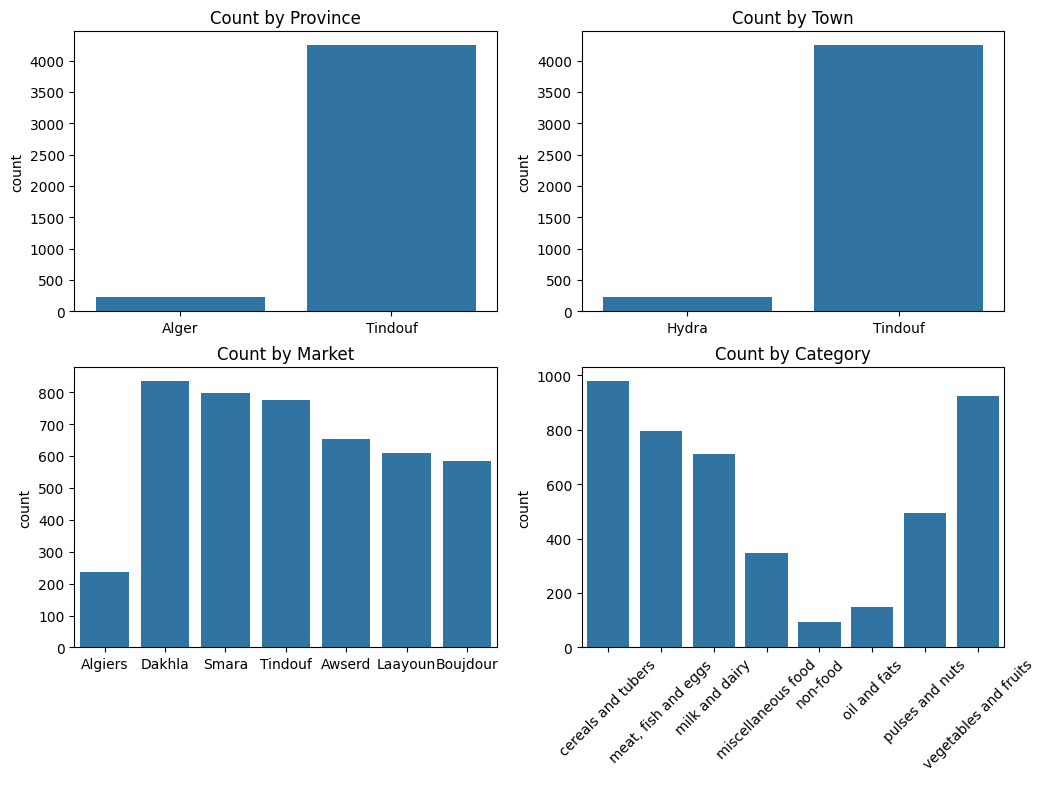

In [5]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
ax = ax.flatten()

ax[0].set_title("Count by Province")
ax[0].set_xlabel(" ")
sns.countplot(data=food, x='province', ax=ax[0])
ax[1].set_title("Count by Town")
ax[1].set_xlabel(" ")
sns.countplot(data=food, x='town', ax=ax[1])
ax[2].set_title("Count by Market")
ax[2].set_xlabel(" ")
sns.countplot(data=food, x='market', ax=ax[2])
ax[3].set_title("Count by Category")
ax[3].set_xlabel(" ")
ax[3].tick_params(axis='x', rotation=45)
sns.countplot(data=food, x='category', ax=ax[3])

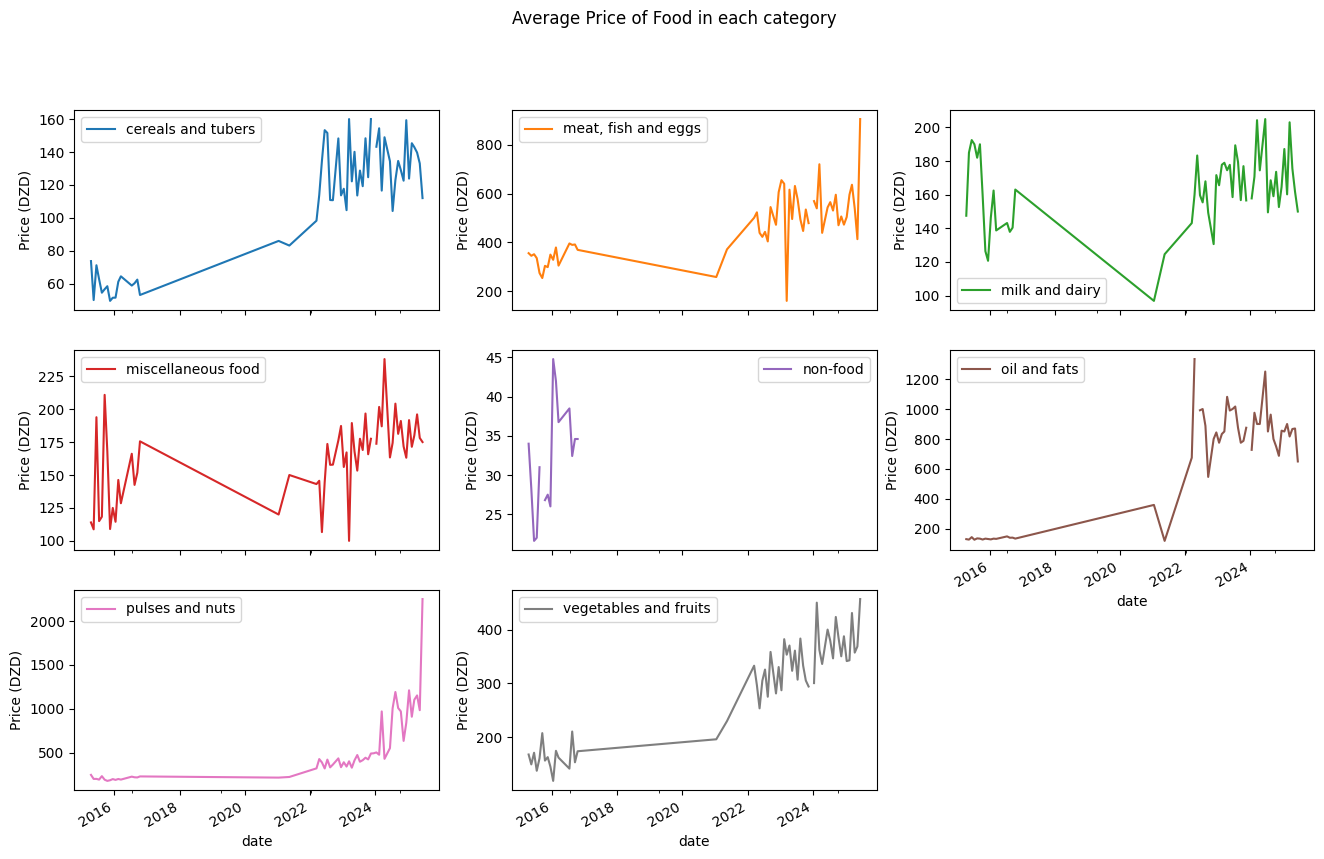

In [6]:
food.groupby(['date', 'category'])['price'].mean().unstack('category').sort_index().plot(figsize=(16,10), subplots=True, layout= (3,3),
                                                                                      title='Average Price of Food in each category',
                                                                                      ylabel='Price (DZD)');

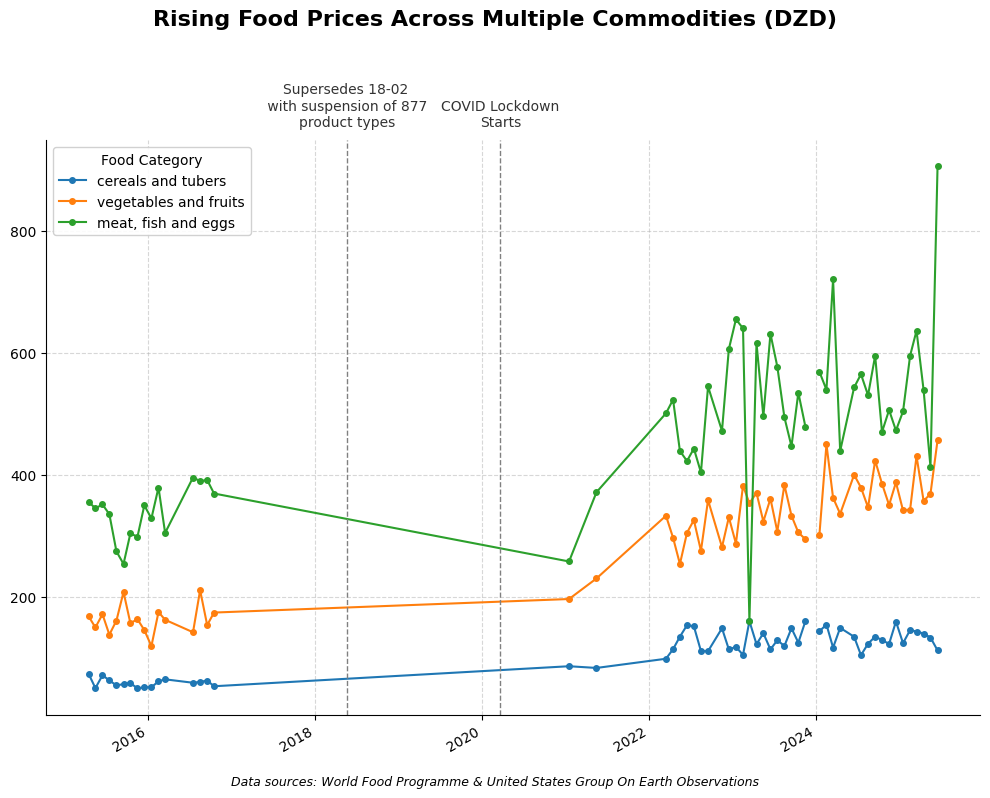

In [8]:
fig, ax = plt.subplots( figsize=(10, 8))

price_ts = (
    food
    .groupby(['date', 'category'])['price']
    .mean()
    .unstack('category')
    [["cereals and tubers", "vegetables and fruits", "meat, fish and eggs"]]
    .sort_index()
)
price_ts.plot(
    ax=ax,
    marker='o',
    markersize=4,
    xlabel=""
)
ax.legend(title='Food Category', loc='upper left', framealpha=0.9)
fig.suptitle("Rising Food Prices Across Multiple Commodities (DZD)", fontsize=16, fontweight='bold')



ax.grid(which='major', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

events = {
    "2018-05-21": "Supersedes 18‑02 \n with suspension of 877 \nproduct types",
    "2020-03-21": "COVID Lockdown\nStarts",
}

ymin, ymax = ax.get_ylim()
for date_str, label in events.items():
    date = pd.to_datetime(date_str)
    ax.axvline(date, color='gray', linestyle='--', linewidth=1)
    ax.text(
        date, ymax * 1.02,        
        label, 
        va='bottom', 
        ha='center', 
        fontsize=10, 
        alpha=0.8
    )

fig.text(
    0.5, 0.01,
    'Data sources: World Food Programme & United States Group On Earth Observations',
    ha='center', fontsize=9, style='italic'
)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
fig.savefig(
    "../dashboard/FoodPricesCommodities.png",
    dpi=300,
    bbox_inches='tight'
)


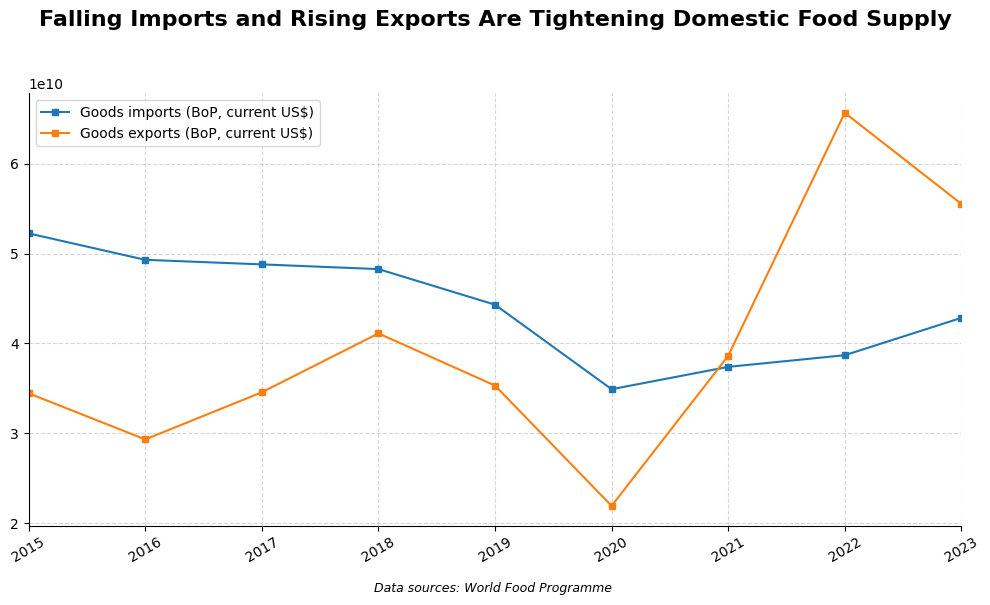

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

indicators[[ 'Goods imports (BoP, current US$)',
    'Goods exports (BoP, current US$)']].plot(
    ax=ax,
    marker='s',
    markersize=4,
    xlabel="",
    rot=30
)


ax.grid(which='major', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle("Falling Imports and Rising Exports Are Tightening Domestic Food Supply", fontsize=16, fontweight='bold')

fig.text(
    0.5, 0.01,
    'Data sources: World Food Programme ',
    ha='center', fontsize=9, style='italic'
)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
fig.savefig(
    "../dashboard/Goods.png",
    dpi=300,
    bbox_inches='tight'
)

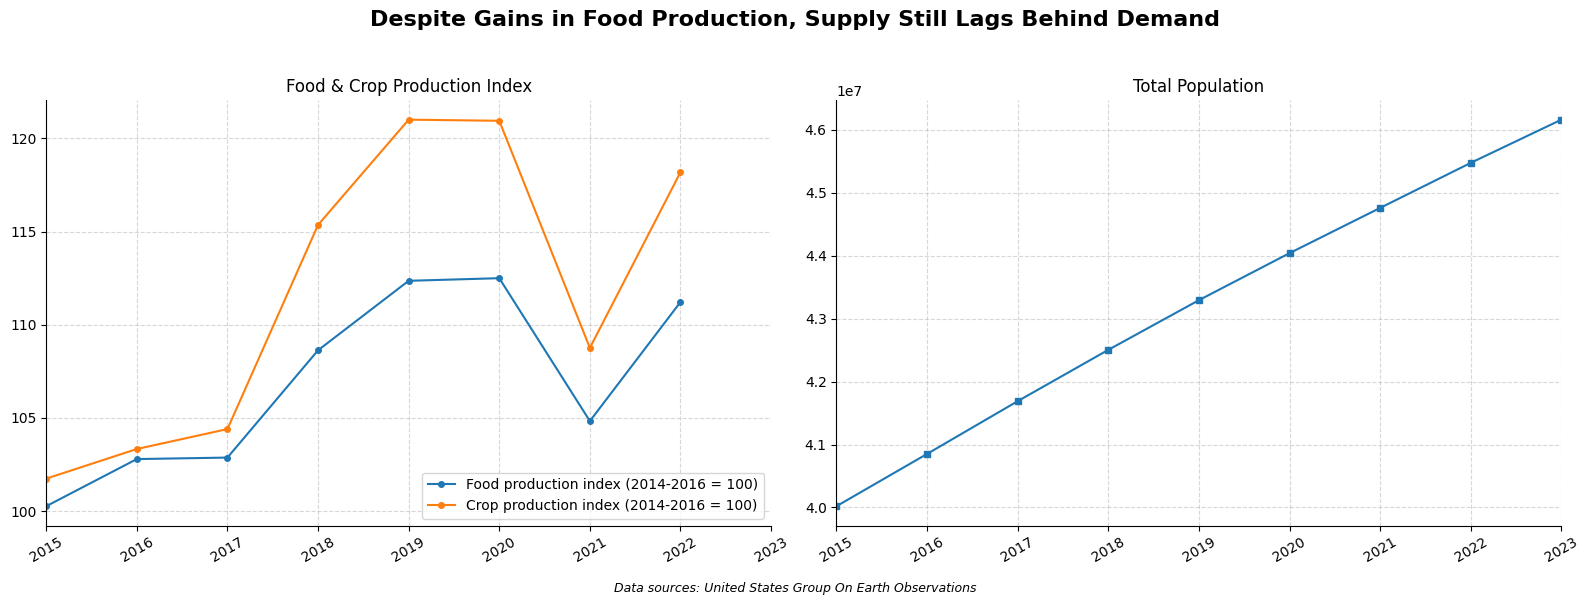

In [10]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))

indicators[[ 'Food production index (2014-2016 = 100)',
    'Crop production index (2014-2016 = 100)']].plot(
    ax=ax[0],
    marker='o',
    title='Food & Crop Production Index',
    markersize=4,
    xlabel="",
    rot=30
)

indicators['Population, total'].plot(
    ax=ax[1],
    marker='s',
    title="Total Population",
    markersize=4,
    xlabel="",
    rot=30
)

for a in ax:
    a.grid(which='major', linestyle='--', alpha=0.5)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

fig.suptitle("Despite Gains in Food Production, Supply Still Lags Behind Demand", fontsize=16, fontweight='bold')

fig.text(
    0.5, 0.01,
    'Data sources: United States Group On Earth Observations',
    ha='center', fontsize=9, style='italic'
)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

fig.savefig(
    "../dashboard/FoodInsecurity.png",
    dpi=300,
    bbox_inches='tight'
)

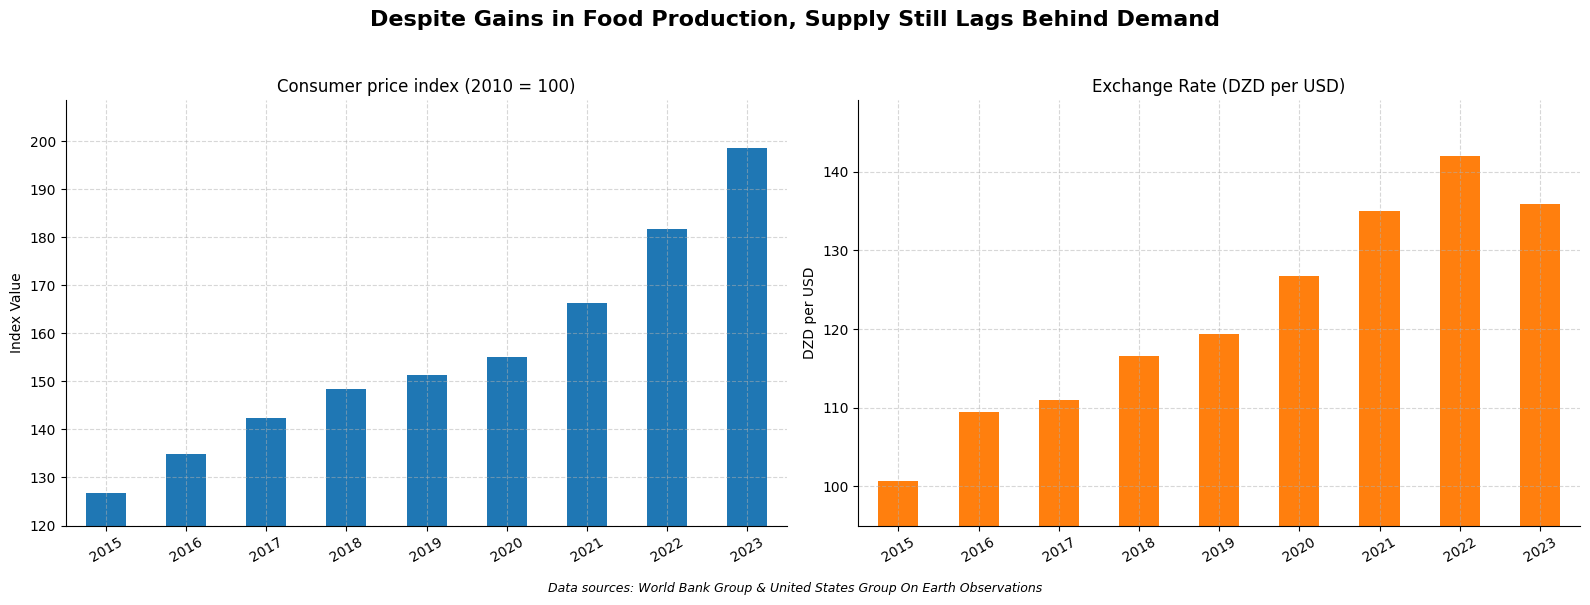

In [11]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(1,2, figsize=(16, 6))
colors = plt.get_cmap('tab10').colors

indicators_year = indicators.copy()
indicators_year.index = indicators_year.index.year.astype(str)

indicators_year['Consumer price index (2010 = 100)'].plot(
    ax=ax[0],
    kind='bar',
    color=colors[0],
    title='Consumer price index (2010 = 100)',
    ylabel="Index Value",
    xlabel="",
    rot=30,
    ylim=(120,None)
)

indicators_year['Official exchange rate (LCU per US$, period average)'].plot(
    ax=ax[1],
    color=colors[1],
    ylim=(95,None),
    kind='bar',
    title="Exchange Rate (DZD per USD)",
    ylabel="DZD per USD",
    xlabel="",
    rot=30
)

for a in ax:
    a.grid(which='major', linestyle='--', alpha=0.5)
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

fig.suptitle("Despite Gains in Food Production, Supply Still Lags Behind Demand", fontsize=16, fontweight='bold')

fig.text(
    0.5, 0.01,
    'Data sources: World Bank Group & United States Group On Earth Observations',
    ha='center', fontsize=9, style='italic'
)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
fig.savefig(
    "../dashboard/Inflation.png",
    dpi=300,
    bbox_inches='tight'
)